In [ ]:
%%shell
# Load the database
# Inspred by https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/postgresql.ipynb#scrollTo=YUj0878jPyz7
sudo apt-get -y -qq update
sudo apt-get -y -qq install postgresql-14
# Start postgresql server
sudo sed -i "s/port = 5432/port = 5433/g" /etc/postgresql/14/main/postgresql.conf
sudo service postgresql start
# Set password
sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'pyqrlew-db'"
pip install -U pyqrlew matplotlib graphviz

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 12.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package logrotate.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../00-logrotate_3.19.0-1ubuntu1.1_amd64.deb ...
Unpacking logrotate (3.19.0-1ubuntu1.1) ...
Selecting previously unselected package netbase.
Preparing to unpack .../01-netbase_6.3_all.deb ...
Unpacking netbase (6.3) ...
Selecting previously unselected package libcommon-sense-perl:amd64.
Preparing to unpack .../02-libcommon-sense-perl_3.75-2build1_amd64.deb ...
Unpacking libcommon-sense-perl:amd64 (3.75

In [ ]:
import pyqrlew as qrl
from pyqrlew.io import PostgreSQL

DB = PostgreSQL()
dataset = DB.extract()

In [ ]:
from graphviz import Source
from IPython.display import display

def display_dot(dot_graph):
    # graph = Source(dot_graph)

    # # # Set the size of the graph
    # # graph.graph_attr['size'] = '8,6'  # Adjust the width and height as needed

    # # # Render the graph to a PNG image
    # # graph.format = 'png'
    # graph.render(filename='graph', format='png', cleanup=True)

    # # Display the graph image with a specific size
    # display(Image(filename='graph.png', width=1600))
    display(Source(dot_graph))

['extract', 'extract', 'beacon']
SELECT * FROM extract.beacon


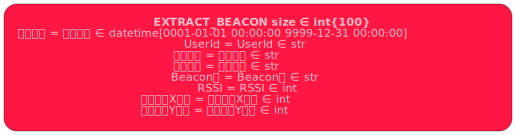

['extract', 'extract', 'census']
SELECT * FROM extract.census


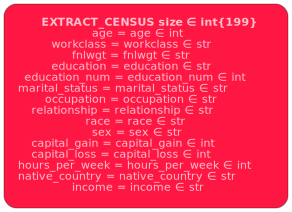

In [ ]:
for p,rel in dataset.relations():
    print(p)
    print(rel.render())
    display_dot(rel.dot())

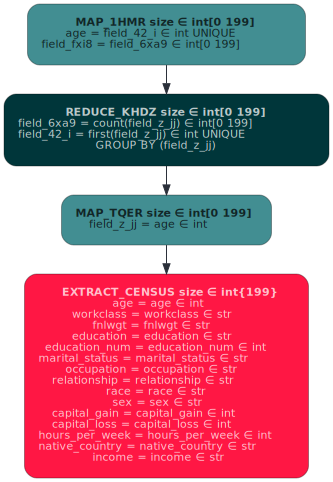

In [ ]:
result = dataset.sql('SELECT age, count(age) FROM extract.census GROUP BY age')
Source(result.dot())

In [ ]:
queries = [
    (("schema_name", "sch", "tab1"), 'SELECT age, count(age) FROM extract.census GROUP BY age LIMIT 10'),
    (("schema_name", "sch", "sum_age"), 'SELECT SUM(age) FROM extract.census'),
    (("schema_name", "new_sch", "bacon"), 'SELECT * FROM extract.beacon')
]

In [ ]:
ds = dataset.from_queries(queries)
print(ds)

Dataset: {}
Schema: {"name": "schema_name", "type": {"name": "Struct", "struct": {"fields": [{"name": "sarus_data", "type": {"name": "Union", "union": {"fields": [{"name": "sch", "type": {"name": "Union", "union": {"fields": [{"name": "sum_age", "type": {"name": "Struct", "struct": {"fields": [{"name": "field_0_go", "type": {"name": "Integer", "integer": {"min": "-9223372036854775808", "max": "9223372036854775807"}}}]}}}, {"name": "tab1", "type": {"name": "Struct", "struct": {"fields": [{"name": "age", "type": {"name": "Integer", "integer": {"min": "-9223372036854775808", "max": "9223372036854775807"}}}, {"name": "field_fxi8", "type": {"name": "Integer", "integer": {"max": "199"}}}]}}}]}}}, {"name": "new_sch", "type": {"name": "Union", "union": {"fields": [{"name": "bacon", "type": {"name": "Struct", "struct": {"fields": [{"name": "検知日時", "type": {"name": "Datetime", "datetime": {"format": "%Y-%m-%d %H:%M:%S.%9f", "min": "0001-01-01 00:00:00.000000000", "max": "9999-12-31 00:00:00.0000

In [ ]:
ds.schema

'{"name": "schema_name", "type": {"name": "Struct", "struct": {"fields": [{"name": "sarus_data", "type": {"name": "Union", "union": {"fields": [{"name": "sch", "type": {"name": "Union", "union": {"fields": [{"name": "sum_age", "type": {"name": "Struct", "struct": {"fields": [{"name": "field_0_go", "type": {"name": "Integer", "integer": {"min": "-9223372036854775808", "max": "9223372036854775807"}}}]}}}, {"name": "tab1", "type": {"name": "Struct", "struct": {"fields": [{"name": "age", "type": {"name": "Integer", "integer": {"min": "-9223372036854775808", "max": "9223372036854775807"}}}, {"name": "field_fxi8", "type": {"name": "Integer", "integer": {"max": "199"}}}]}}}]}}}, {"name": "new_sch", "type": {"name": "Union", "union": {"fields": [{"name": "bacon", "type": {"name": "Struct", "struct": {"fields": [{"name": "検知日時", "type": {"name": "Datetime", "datetime": {"format": "%Y-%m-%d %H:%M:%S.%9f", "min": "0001-01-01 00:00:00.000000000", "max": "9999-12-31 00:00:00.000000000"}}}, {"name":

In [ ]:
ds.size

'{"statistics": {"name": "Union", "union": {"fields": [{"name": "sch", "statistics": {"name": "Union", "union": {"fields": [{"name": "sum_age", "statistics": {"struct": {"size": "199"}}}, {"name": "tab1", "statistics": {"struct": {"size": "10"}}}]}}}, {"name": "new_sch", "statistics": {"name": "Union", "union": {"fields": [{"name": "bacon", "statistics": {"struct": {"size": "100"}}}]}}}]}}}'